# Deadly Visualizations!!!

![Image](../images/viz_types_portada.png)

## Setup

First we need to create a basic setup which includes:

- Importing the libraries.

- Reading the dataset file (source [Instituto Nacional de Estadística](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout)).

- Create a couple of columns and tables for the analysis.

__NOTE:__ some functions were already created in order to help you go through the challenge. However, feel free to perform any code you might need.

In [1]:
# imports

import sys
import re
sys.path.insert(0, "../modules")

import numpy as np
import pandas as pd
# plotly
import plotly.express as px   # conda install plotly
import plotly.io as pio

# cufflinks
%pip install cufflinks

import cufflinks as cf   
cf.go_offline()

import module as mod     # functions are include in module.py
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#MI ANÁLISIS: INFARTOS POR EDAD Y SEXO

In [2]:
# read dataset

deaths = pd.read_csv('../data/7947.csv', sep=';', thousands='.')

deaths.info()
deaths.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


,Causa de muerte,Sexo,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830


In [3]:
# add some columns...you'll need them later

deaths['cause_code'] = deaths['Causa de muerte'].apply(mod.cause_code)
deaths['cause_group'] = deaths['Causa de muerte'].apply(mod.cause_types)
deaths['cause_name'] = deaths['Causa de muerte'].apply(mod.cause_name)

deaths.info()
deaths.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
 5   cause_code       301158 non-null  object
 6   cause_group      301158 non-null  object
 7   cause_name       301158 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.4+ MB


,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,001-102,Multiple causes,I-XXII.Todas las causas


In [4]:
deaths.describe() #cálculo de la estadística de panda (solo numéricas)

,Periodo,Total
count,301158.000000,301158.000000
mean,1999.000000,553.335937
std,11.254647,5904.622883
min,1980.000000,0.000000
25%,1989.000000,1.000000
50%,1999.000000,12.000000
75%,2009.000000,100.000000
max,2018.000000,427721.000000


In [5]:
deaths['Sexo'].unique()

deaths['Edad'].unique()

deaths['Causa de muerte'].unique()
deaths['cause_code'].unique()

array(['001-102', '001-008', '001', '002', '003', '004', '005', '006',
       '007', '008', '009-041', '009', '010', '011', '012', '013', '014',
       '015', '016', '017', '018', '019', '020', '021', '022', '023',
       '024', '025', '026', '027', '028', '029', '030', '031', '032',
       '033', '034', '035', '036', '037', '038', '039', '040', '041',
       '042-043', '042', '043', '044-045', '044', '045', '046-049', '046',
       '047', '048', '049', '050-052', '050', '051', '052', '053-061',
       '053', '054', '055', '056', '057', '058', '059', '060', '061',
       '062-067', '062', '063', '064', '065', '066', '067', '068-072',
       '068', '069', '070', '071', '072', '073', '074-076', '074', '075',
       '076', '077-080', '077', '078', '079', '080', '081', '082',
       '083-085', '083', '084', '085', '086-089', '086', '087', '088',
       '089', '090-102', '090', '091', '092', '093', '094', '095', '096',
       '097', '098', '099', '100', '101', '102'], dtype=object)

In [6]:
# lets check the categorical variables

var_list = ['Sexo', 'Edad', 'Periodo', 'cause_code', 'cause_name', 'cause_group']

categories = mod.cat_var(deaths, var_list)
categories

,categorical_variable,number_of_possible_values,values
0,cause_code,117,"[001-102, 001-008, 001, 002, 003, 004, 005, 00..."
1,cause_name,117,"[I-XXII.Todas las causas, I.Enfermedades infec..."
2,Periodo,39,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."
3,Edad,22,"[Todas las edades, Menos de 1 año, De 1 a 4 añ..."
4,Sexo,3,"[Total, Hombres, Mujeres]"
5,cause_group,2,"[Multiple causes, Single cause]"


In [7]:
# we need also to create a causes table for the analysis

causes_table = deaths[['cause_code', 'cause_name']].drop_duplicates().sort_values(by='cause_code').reset_index(drop=True)

causes_table

,cause_code,cause_name
0,001,Enfermedades infecciosas intestinales
1,001-008,I.Enfermedades infecciosas y parasitarias
2,001-102,I-XXII.Todas las causas
3,002,Tuberculosis y sus efectos tardíos
4,003,Enfermedad meningocócica
...,...,...
112,098,Suicidio y lesiones autoinfligidas
113,099,Agresiones (homicidio)
114,100,Eventos de intención no determinada
115,101,Complicaciones de la atención médica y quirúrgica


In [ ]:
# And some space for free-style Pandas!!! (e.g.: df['column_name'].unique())








## Lets make some transformations

Eventhough the dataset is pretty clean, the information is completely denormalized as you could see. For that matter a collection of methods (functions) are available in order to generate the tables you might need:

- `row_filter(df, cat_var, cat_values)` => Filter rows by any value or group of values in a categorical variable.

- `nrow_filter(df, cat_var, cat_values)` => The same but backwards. 

- `groupby_sum(df, group_vars, agg_var='Total', sort_var='Total')` => Add deaths by a certain variable.

- `pivot_table(df, col, x_axis, value='Total')`=> Make some pivot tables, you might need them...

__NOTE:__ be aware that the filtering methods can perform a filter at a time. Feel free to perform the filter you need in any way you want or feel confortable with.

In [8]:
# Example 1

dataset = mod.row_filter(deaths, 'Sexo', ['Total'])
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset= mod.row_filter(dataset, 'cause_name', ['I-XXII.Todas las causas'])

dataset.head(40)


#esto me está dando el número total de muertes por año (independientemente de las edades, sexo y causas)

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2012,402950,001-102,Multiple causes,I-XXII.Todas las causas
5,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,001-102,Multiple causes,I-XXII.Todas las causas
6,001-102 I-XXII.Todas las causas,Total,Todas las edades,2013,390419,001-102,Multiple causes,I-XXII.Todas las causas
7,001-102 I-XXII.Todas las causas,Total,Todas las edades,2011,387911,001-102,Multiple causes,I-XXII.Todas las causas
8,001-102 I-XXII.Todas las causas,Total,Todas las edades,2005,387355,001-102,Multiple causes,I-XXII.Todas las causas
9,001-102 I-XXII.Todas las causas,Total,Todas las edades,2008,386324,001-102,Multiple causes,I-XXII.Todas las causas


In [9]:
# Example 2

group = ['cause_group','Periodo']

dataset2 = mod.groupby_sum(deaths, group)
dataset.head()

#no tienen sentido los datos, habría que seleccionar solo "todas las causas" para no duplicar al sumar.


,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2012,402950,001-102,Multiple causes,I-XXII.Todas las causas


## ...and finally, show me some insights with Plotly!!!

In [10]:
# Cufflinks histogram
dataset_column=dataset['Total']

dataset_column.iplot(kind='hist',
                     title='TOTAL DEATHS by period',
                     yTitle='AXIS TITLE',
                     xTitle='Number of deaths')


In [11]:
# Cufflinks bar plot


dataset.iplot(kind='bar',
                  x='Periodo',
                  y='Total',
                  xTitle='Year',
                  yTitle='Number of death',
                  title='Total deaths by year',
                colors=['green'],)




In [12]:
# Cufflinks line plot
dataset=dataset.sort_values(by='Periodo')

dataset.iplot( kind= 'line',
                x='Periodo',
                  y='Total',
                  xTitle='Year',
                  yTitle='Number of death',
                  title='Total deaths by year')




In [13]:
# Cufflinks scatter plot

dataset.iplot(kind= 'scatter',
             x='Periodo',
             y='Total',
             mode='markers',
              xTitle='Period', 
             yTitle='Number of deaths',
                      title='Total deaths by period')

            

In [14]:
#dataset  por sexos hombres


dataseth = mod.row_filter(deaths, 'Sexo', ['Hombres'])
dataseth = mod.row_filter(dataseth, 'Edad', ['Todas las edades'])
dataseth= mod.row_filter(dataseth, 'cause_code', ['055'])
dataseth=dataseth.sort_values(by='Periodo')


dataseth.iplot(x='Periodo',
              y=['Total'],
              subplots=True,
              xTitle='Periodo',
              yTitle='Total',
              title='Hombres infarto agudo de miocardio');

In [11]:

dataset5 = mod.pivot_table(deaths, 'cause_code',  'Sexo')
dataset5.head()



cause_code,Sexo,001,001-008,001-102,002,003,004,005,006,007,...,093,094,095,096,097,098,099,100,101,102
0,Hombres,13310,288068,14528688,37942,3860,89660,24062,92868,2546,...,83108,10350,33694,10804,143376,181592,20420,8170,14920,2008
1,Mujeres,20734,204418,13298528,15510,4110,100022,21674,21704,596,...,51050,6978,8680,5370,70878,60150,8040,3420,14192,838
2,Total,34044,492486,27827216,53452,7970,189682,45736,114572,3142,...,134158,17328,42374,16174,214254,241742,28460,11590,29112,2846


In [15]:
deaths_infarto_df=deaths[deaths['cause_code']=='055']
deaths_infarto_df
deaths_infarto_df['cause_group'].value_counts()

cause_group
Single cause    2574
Name: count, dtype: int64

In [16]:
deaths_infartoh_df=deaths_infarto_df[deaths_infarto_df['Sexo']=='Hombres']
deaths_infartom_df=deaths_infarto_df[deaths_infarto_df['Sexo']=='Mujeres']

deaths_infartoh_df



,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
160446,055 Infarto agudo de miocardio,Hombres,Todas las edades,2018,8660,055,Single cause,Infarto agudo de miocardio
160447,055 Infarto agudo de miocardio,Hombres,Todas las edades,2017,8911,055,Single cause,Infarto agudo de miocardio
160448,055 Infarto agudo de miocardio,Hombres,Todas las edades,2016,9009,055,Single cause,Infarto agudo de miocardio
160449,055 Infarto agudo de miocardio,Hombres,Todas las edades,2015,9423,055,Single cause,Infarto agudo de miocardio
160450,055 Infarto agudo de miocardio,Hombres,Todas las edades,2014,9464,055,Single cause,Infarto agudo de miocardio
...,...,...,...,...,...,...,...,...
161299,055 Infarto agudo de miocardio,Hombres,95 y más años,1984,46,055,Single cause,Infarto agudo de miocardio
161300,055 Infarto agudo de miocardio,Hombres,95 y más años,1983,33,055,Single cause,Infarto agudo de miocardio
161301,055 Infarto agudo de miocardio,Hombres,95 y más años,1982,40,055,Single cause,Infarto agudo de miocardio
161302,055 Infarto agudo de miocardio,Hombres,95 y más años,1981,32,055,Single cause,Infarto agudo de miocardio


In [17]:
deaths_infarto_df[deaths_infarto_df['Sexo']=='Hombres'].iplot(kind='bar',
                  x='Periodo',
                  y='Total',
                  xTitle='Periodo',
                  yTitle='Número de muertes por infarto',
                  title='Total infartos by year MEN',
                  colors=['green'])
                      

In [18]:
deaths_infarto_df[deaths_infarto_df['Sexo']=='Mujeres'].iplot(kind='bar',
                  x='Periodo',
                  y='Total',
                  xTitle='Periodo',
                  yTitle='Número de muertes por infarto',
                  title='Total infartos by year MUJERES',
                  colors=['RED'])

In [19]:
#dataset  por sexos mujeres

datasetm = mod.row_filter(deaths, 'Sexo', ['Mujeres'])
datasetm = mod.row_filter(datasetm, 'Edad', ['Todas las edades'])
datasetm= mod.row_filter(datasetm, 'cause_code', ['055'])
datasetm=datasetm.sort_values(by='Periodo')


datasetm.iplot(x='Periodo',
              y=['Total'],
         
              xTitle='Periodo',
              yTitle='Total',
              title='Mujeres infarto agudo de miocardio');

In [24]:
deaths_infartoh_df=deaths_infartoh_df.sort_values(by='Periodo')
deaths_infartom_df=deaths_infartom_df.sort_values(by='Periodo')


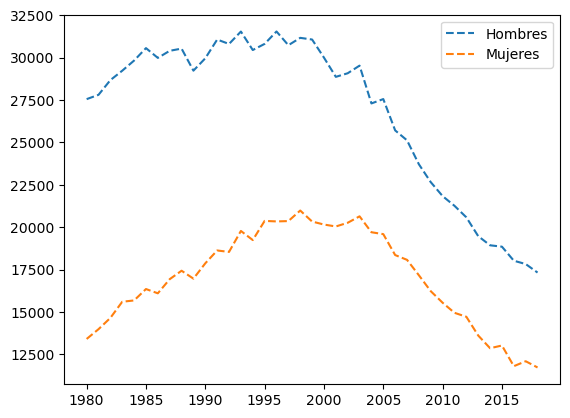

In [39]:
plt.plot(deaths_infartoh_df['Periodo'],deaths_infartoh_df['Total'],label='Hombres', linestyle="--")
plt.plot(deaths_infartom_df['Periodo'],deaths_infartom_df['Total'],label='Mujeres',linestyle="--")
plt.legend()
plt.show()


In [23]:
deaths_infartoh_df=deaths_infartoh_df.groupby('Periodo').sum('Total')
deaths_infartoh_df.reset_index(inplace=True)
deaths_infartoh_df.iplot( kind= 'line',
                x='Periodo',
                y='Total',
                  xTitle='Year',
                  yTitle='Number of death men',
                  title='Total deaths by year men')

deaths_infartom_df=deaths_infartom_df.groupby('Periodo').sum('Total')
deaths_infartom_df.reset_index(inplace=True)
deaths_infartom_df.iplot( kind= 'line',
                x='Periodo',
                y='Total',
                  xTitle='Year',
                  yTitle='Number of death women',
                  title='Total deaths by year women')



In [50]:

dataset5 = mod.pivot_table(deaths, 'cause_code',  'Sexo')
dataset5.head()



cause_code,Sexo,001,001-008,001-102,002,003,004,005,006,007,...,093,094,095,096,097,098,099,100,101,102
0,Hombres,13310,288068,14528688,37942,3860,89660,24062,92868,2546,...,83108,10350,33694,10804,143376,181592,20420,8170,14920,2008
1,Mujeres,20734,204418,13298528,15510,4110,100022,21674,21704,596,...,51050,6978,8680,5370,70878,60150,8040,3420,14192,838
2,Total,34044,492486,27827216,53452,7970,189682,45736,114572,3142,...,134158,17328,42374,16174,214254,241742,28460,11590,29112,2846


In [51]:
deaths_infartoh_df.iplot(x='Periodo',
              y=['Total'],
         
              xTitle='Periodo',
              yTitle='Total',
              title='Mujeres infarto agudo de miocardio');

In [53]:
deaths_infartoh_df=deaths_infarto_df[deaths_infarto_df['Sexo']=='Hombres']
deaths_infartoh_df.groupby('Edad')
deaths_infartoh_df2=deaths_infartoh_df.groupby('Edad').sum('Total')
deaths_infartoh_df2.reset_index(inplace=True)
deaths_infartoh_df2.iplot( kind= 'bar',
                x='Edad',
                y='Total',
                  xTitle='Edad',
                  yTitle='Number of death men',
                  title='Total deaths by year men')

deaths_infartom_df2=deaths_infarto_df[deaths_infarto_df['Sexo']=='Mujeres']
deaths_infartom_df2.groupby('Edad')
deaths_infartom_df2.reset_index(inplace=True)
deaths_infartom_df2.iplot( kind= 'bar',
                x='Edad',
                y='Total',
                  xTitle='Year',
                  yTitle='Number of death women',
                  title='Total deaths by year women')



Text(0.5, 1.0, 'por edades')

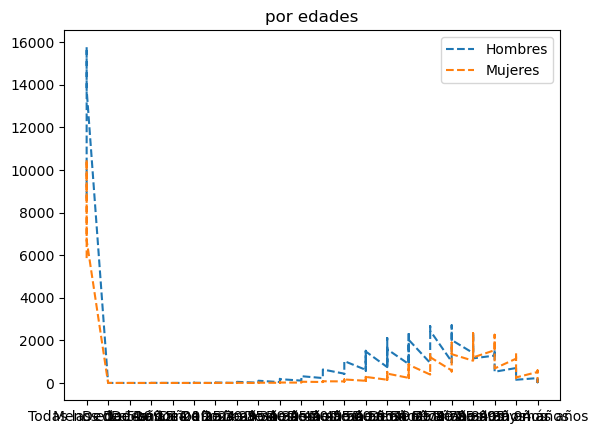

In [45]:
plt.plot(deaths_infartoh_df['Edad'],deaths_infartoh_df['Total'],label='Hombres', linestyle="--")
plt.plot(deaths_infartom_df['Edad'],deaths_infartom_df['Total'],label='Mujeres',linestyle="--")
plt.legend()
plt.title('por edades')

Text(0.5, 1.0, 'por edades')

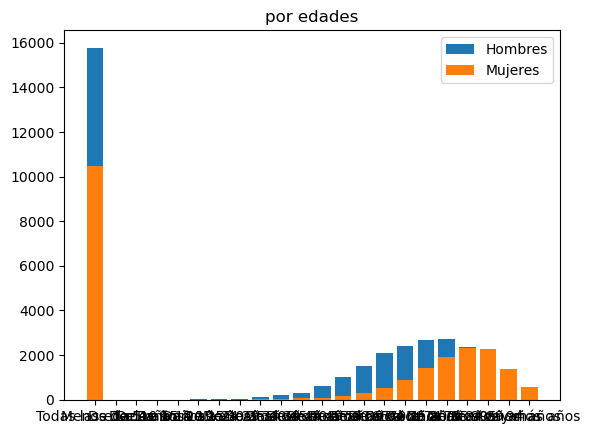

In [46]:
plt.bar(deaths_infartoh_df['Edad'],deaths_infartoh_df['Total'],label='Hombres')
plt.bar(deaths_infartom_df['Edad'],deaths_infartom_df['Total'],label='Mujeres')#hay que hacer los subblots para que se vea.
plt.legend()
plt.title('por edades')

ValueError: x must be 1D

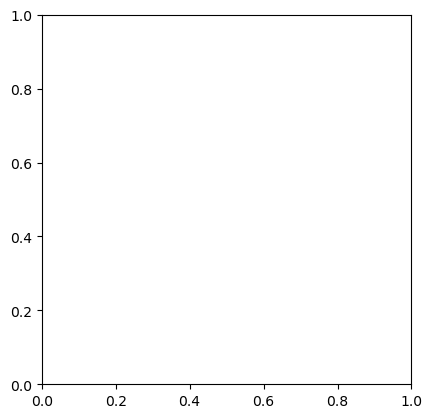

In [35]:

# Data


# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels)
# plt.show()

labels = ["Hombres", "Mujeres"]
 
value = [deaths_infartoh_df['Total'], deaths_infartom_df['Total']]
 
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels)
 
# show plot
plt.show()
